## Rappels

$$ \mathsf{Donnees} "=" \mathsf{Modele}+\mathsf{Bruit} $$

$H_0$ est un modèle. Si le bruit est grand  pour que le modèle explique les données en général la $p$-value est petite donc incite à rejeter le modèle. 

Notre objectif est soit:

- de trouver une hypothèse $H_0$ qui ne soit pas rejetée par le test statistique. (c'est le cas de l'identification du biais d'une pièce)
  Cela signifie alors:
    + que l'explication par notre hypothèse est plausible (je n'ai pas dit certaine),
    + que la $p$-value du test statistique, en général GRANDE, est suffisamment convaincante pour contrôler le bruit dans les données. 

- de trouver que nos données sont meilleures selon notre critère qu'un certains $H_0$  (c'est le cas du Lady testing Tea de Fisher)
  Cela signifie alors:
     + que la $p$-value du test statistique doit être si possible suffisamment PETITE pour dire que ce n'est probablement pas le bruit sous $H_0$ qui explique les données.

Remarque: Certains veulent exclure les seuils de significiance statistique, voir l'expression "$p < 0.05$".
(voir Moving to a world beyond "$p<0.05$" https://www.tandfonline.com/doi/full/10.1080/00031305.2019.1583913  (2019)  Il y a dans la section 7 de cet article des listes de conseils personnels au sujet de l'utilisation des $p$-values. L'institut américaine de statistiques appliquées à aussi fait une déclaration en 2016 https://www.amstat.org/asa/files/pdfs/P-ValueStatement.pdf pour un résumé et la déclaration complète : https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108 )

Démarche:

+ On décide d'étudier un phénomène. (pièce biaisée, nouveau médicament, ... )

+ On peut observer certaines données diverses sur ce phénoméne, faire des statistiques descriptives sur ces données pour synthétiser leur description, on se renseigne auprès des experts du phénomène, ...

+ Tout cette phase permets de concevoir un modèle statistique (une hypothèse $H_0$, ou une famille de modèles) que l'ont espère correct.

+ On planifie alors des tests statistiques sur de nouvelles données, spécifiant le mode de collecte de ces données. (pour plus tard, si on veut trouver des causes et non seulement des correlations, il faut prévoir de faire des randomisations lors de la  collecte)

+ On collecte les nouvelles données.

+ On réalise les tests statistiques sur les nouvelles données.

+ On interpréte les résultats (par exemple des $p$-values) en remontant jusqu'au modèle voir le contexte du phénomène étudié. (la simple comparaison $p < 0.05$ est trop pauvre).

## Plan de la séance


- Choix de tests: Tout les cas possibles et heuristique du ratio pour les meilleurs tests (Fin de la séance précédente).



- La médiane comme solution aux moindres différences absolue
- La moyenne comme solution aux moindres carrés
- Estimateurs et espaces $\mathcal{L}^p$, variantes (ex: moyenne tronquées, médian des $k$-moyennes,...).
- Distributions de balles dans des casiers maximisant les différences entre des estimateurs.
- Distance de Wasserstein (optionel)
- Corrélation entre deux variables (et cas particulier de l'indépendance)
- Distribution marginales



- Notes de lecture d'un article de Persi Diaconis sur l'analyse exploratoire de données de 1985.

## Choix de tests

Nous allons illustrer la conception de tests statistiques en s'appuyant sur un modèle simple de distribution de probabilité totalement discrétisé.

Fixons deux entiers positifs $n$ et $M$.
Considérons une variable aléatoire $X$ à valeur dans $[M] := \{0,\ldots M-1\}$ pour laquelle la probabilité de chaque $i\in[M]$ est $\mathsf{Proba}(X=i) = \frac{a_i}{n}$ avec $a_i$ un entier positif (ou nul). 

Si on interprète chaque fraction de probabilité $\frac{1}{n}$ comme une balle et chaque valeur possible $i\in[M]$ comme un casier, la loi de probabilité corresponds à la distribution de $a_i$ balles dans chaque casier $i$.
Ainsi une loi de probabilité peut être écrite par la suite/liste d'entiers positifs (ou nuls) $[a_i\mbox{ for i in range(M)}]$ telle que $\sum_i a_i = n$.

La réalisation de la variable aléatoire consiste donc à tirer une balle au hasard selon la mesure uniforme parmi les $n$ puis à retourner pour valeur de $X$ l'entier $i$ numérotant le casier qui le contient.


TODOB.1 Implémentez la fonction suivante qui tire aléatoirement une distribution aléatoire en ajoutant au hasard $n$ balles dans $M$ casiers.

In [1]:
import random
from typing import *

def random_distribution(nb_balles:int,nb_casiers:int)->Tuple[int]:
    casiers = [0]*nb_casiers
    for i in range(nb_balles):
        casiers[random.randint(0,nb_casiers-1)] += 1
    return tuple(casiers)

In [2]:
nb_balles = 10
nb_casiers = 7
une_distribution = random_distribution(nb_balles,nb_casiers)
print(une_distribution)

(1, 1, 0, 2, 1, 3, 2)


TODOB.2 On suppose que les casiers sont alignés horizontalement en colonnes de balles. Ainsi la $y$-ième balle du casier $x$ corresponds à un point de coordonnée $(x,y)$. Implémentez la fonction qui a une distribution associe sont ensemble de points. Puis une autre qui dessine une distribution à l'aide de __.scatter__.

In [3]:
def points_of_distribution(distribution:Tuple[int])->List[Tuple[int]]:
    return [(x,distribution[x]) for  x in range(len(distribution))]

In [4]:
def scatter_distribution(distribution:Tuple[int],color='blue')->None:
    points = points_of_distribution(distribution)
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x,y,marker='o',c='blue')
    return

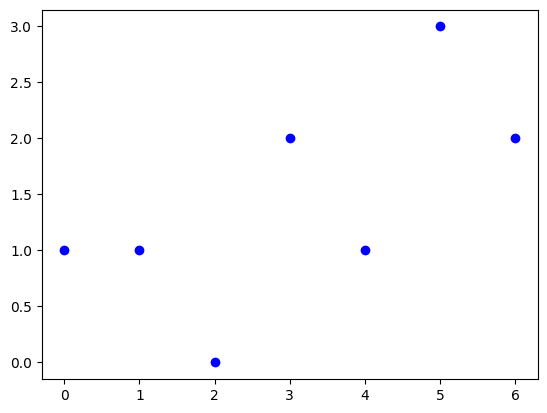

In [5]:
import matplotlib.pyplot as plt

scatter_distribution(une_distribution)
plt.show()

Supposons que notre hypothèse $H_0$ est que la variable $X$ est décrite par une telle distribution $d^0=(d^0_i)_{i\in [M]}\in \mathbb{N}^M$.

Nous cherchons un sous-ensemble dit de rejection $R \subseteq [M]$ car il permet de rejeter l'hypothèse $H_0$ si le résultat de l'expérience est dans $R$.

Notons $\overline{R} := [M]-R$ le complémentaire de $R$ dans $[M]$.

TODOB.3 Etant donné l'ensemble $R$, et la distribution $d^0 = (d^0_i)_{i\in [M]}$ quelle est la probabilité $\alpha$ d'un faux négatif (erreur de type 1) ? A t on en toute généralité pour une valeur $\alpha$ unicité de l'ensemble $R$ ?

$$\alpha = \frac{1}{n}\sum_{i \in R} d^0_i.$$

Il n'y a pas unicité par exemple pour $d^0=[0,2,1,2,1,2,0]$ et $\alpha=\frac{3}{8}$ tout choix d'un casier avec $2$ balles et un casier avec $1$ balle convient. Cela fait au moins $3\times 2=6$ possibilité.

À ce stade nous ne pouvons rien dire que la probabilité $\beta$ des faux positifs car nous n'avons aucune hypothèse lorsque $H_0$ n'est pas satisfait (hormis la faible information que c'est différent de $H_0$, cela pourrait par exemple être déterministe, ou bien les tirages non-indépendants...).  

Pour arriver à dire des choses très précise commençons par supposer que si $H_0$ n'est pas satisfaite, alors les données sont générés selon une distribution $d^a=(d^a_i)_{i\in[M]}$ une autre __hypothèse__ dite __alternative__ $H_a$ (avec pour seule contraintes $d^a \neq d^0$ mais le même $n$ et le même $M$). 

TODOB.4 Etant donné l'ensemble $R$ permettant de rejeter $H_0$, quelle est la probabilité $\beta$ d'accepter l'hypothèse $H_0$ alors que les données sont générées par $H_a$ ?

$$ \beta = \frac{1}{n}\sum_{i \in \overline{R}} d_i^a.$$

Pour tout ensemble $R$ nous pouvons donc calculer les probabilités $(\alpha,\beta)$ des erreurs de type I et II. 

TODOB.5 Implémentez la fonction qui calcule pour tout choix possible de $R$ cette distribution de paires $(\alpha(R),\beta(R))$, puis la seconde fonction qui teste tout les ensembles possibles sous forme de vecteur booleen indiquant l'appartenance de chaque casier à $R$ et renvoit un dictionnaire indexé par ces vecteurs et dont les valeurs sont les paires $(\alpha,\beta)$. Quelles sont les limites de votre seconde fonction ?

In [6]:
def alpha_beta_from_rejection_set(d0:Tuple[int],da:Tuple[int],r:Set)->Tuple[float]:
    n = sum(d0[i] for i in range(len(d0)))
    alpha = sum(d0[i] for i in range(len(d0)) if i in r)/n
    beta = sum(da[i] for i in range(len(da)) if i not in r)/n
    return (alpha,beta)

def alpha_beta_from_rejection_set2(d0:Tuple[int],da:Tuple[int],r:Set)->Tuple[float]:
    d1 = []
    d2 = []
    n = len(d0)
    for i in range(len(d0)):
        if i in r:
            d1.append(d0[i])
        if i not in r:
            d2.append(da[i])
    alpha = (1/n)*sum(d1)
    beta = (1/n)*sum(d2)
    return (alpha,beta)
    

import itertools

def convert_boolean_vector_to_set(boolean_vector:Tuple[bool])->Set[int]:
    return set([i for i in range(len(boolean_vector)) if boolean_vector[i]==True])

def alpha_beta_of_all_rejection_sets(d0:Tuple[int],da:Tuple[int])->Dict:
    alpha_beta_per_rejection_set = {}
    for boolean_vector in itertools.product([True,False],repeat=len(d0)):
        r = convert_boolean_vector_to_set(boolean_vector)
        (alpha,beta) = alpha_beta_from_rejection_set(d0,da,r)
        alpha_beta_per_rejection_set[boolean_vector] = (alpha,beta)
    return alpha_beta_per_rejection_set

In [7]:
n = 10
m = 10
d0 = random_distribution(n,m)
while True:
    da = random_distribution(n,m)
    if da != d0:
        break
alpha_betas = alpha_beta_of_all_rejection_sets(d0,da)
alpha_betas

{(True, True, True, True, True, True, True, True, True, True): (1.0, 0.0),
 (True, True, True, True, True, True, True, True, True, False): (0.8, 0.2),
 (True, True, True, True, True, True, True, True, False, True): (0.9, 0.1),
 (True, True, True, True, True, True, True, True, False, False): (0.7, 0.3),
 (True, True, True, True, True, True, True, False, True, True): (0.9, 0.2),
 (True, True, True, True, True, True, True, False, True, False): (0.7, 0.4),
 (True, True, True, True, True, True, True, False, False, True): (0.8, 0.3),
 (True, True, True, True, True, True, True, False, False, False): (0.6, 0.5),
 (True, True, True, True, True, True, False, True, True, True): (0.9, 0.1),
 (True, True, True, True, True, True, False, True, True, False): (0.7, 0.3),
 (True, True, True, True, True, True, False, True, False, True): (0.8, 0.2),
 (True, True, True, True, True, True, False, True, False, False): (0.6, 0.4),
 (True, True, True, True, True, True, False, False, True, True): (0.8, 0.3),
 (T

TODOB.6 Dessiner à l'aide de __.scatter__ sous forme de nuage de points les $(\alpha(R),\beta(R))_{R \subset [M]}$. Discutez si un meilleur choix s'impose naturellement pour $R$ ? Pourquoi les paires $(\alpha=0,\beta=1)$ et $(\alpha=1,\beta=0)$ semblent toujours présentes ?

d0 (2, 0, 0, 2, 1, 0, 1, 1, 1, 2)
da (0, 1, 1, 0, 1, 1, 1, 2, 1, 2)


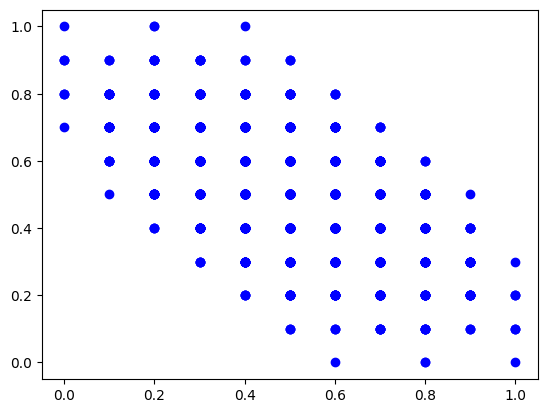

[1.0, 0.8, 0.9, 0.7, 0.9, 0.7, 0.8, 0.6, 0.9, 0.7]


In [8]:
print(f'd0 {d0}')
print(f'da {da}')
alphas = [ alpha for (alpha,_) in alpha_betas.values()]
betas = [ beta for (_,beta) in alpha_betas.values()]
plt.scatter(alphas,betas,marker='o',c='blue')
plt.show()
print(alphas[:10])

Une paire $(\alpha,\beta)$ est au moins aussi bonne que $(\alpha',\beta')$ dès que $\alpha \leq \alpha'$ et $\beta \leq \beta'$.
En général il n'y pas d'élément maximum pour cet ordre partiel. 
L'ensemble des éléments maximals forme une frontière dites de Pareto dans les optimisations multi-critére.
Géométriquement, c'est l'ensemble des points dont le quart de plan inférieur gauche est vide d'autres points.
Les paires $(1,0)$ et $(0,1)$ sont toujours présentes car elles correspondent à $R$ vide ou $R=[M]$.

Pour chercher un bon test pour $H_0$ contre $H_1$, nous allons utiliser l'argument de Neyman et Pearson dans un article de 1933: _On the problem of most efficient tests of statistical hypotheses_ http://www.stats.org.uk/statistical-inference/NeymanPearson1933.pdf mais dans le cas totalement discret. (Eux travaillent dans le plan en continue, mais les idées sont les mêmes)

Fixons un nombre de boule $a$ de sorte que $\alpha=\frac{a}{n}$ soit la probabilité de faux négatifs si c'est la distribution $d^0$ de $H_0$ qui génére les données.

Nous utilisons alors l'heuristique gloutonne suivante: on tri les casiers selon les ratios $\frac{d^a_i}{d^0_i}$ _décroissants_, (ignorant les possibles égalités à ce stade) sachant que par convention, si $d^0_i=0$, alors le casier est prioritaire car le ratio est fixé par convention à $+\infty$.

On rajoute alors dans cet ordre les casiers à l'ensemble de rejection $R$, jusqu'à ce que $D^0(R) := \sum_{i\in R} d^0_i$ soit au moins égal à $a$ définissant $\alpha$. Pour le dernier casier $j$ ajouté, on rejette alors $H_0$ seulement avec la probabilité $1-\frac{D^0(R)-a}{d^0_j}$.

TODOB.7 Que se passe t il si $D^0(R) = a$ ? Expliquer pourquoi dans les autres cas, la probabilité de rejeter $H_0$ est plus faible pour le dernier casier ajouté à l'ensemble de rejection $R$ ?

Si $D^0(R)=a$, on a selectionner comme ensemble de rejection exactement $a$ balles donc la probabilité de rejeté $H_0$ alors que nous sommes sous $H_0$ est bien $\frac{a}{n}=\alpha$.

Si $D^0(R)>a$, alors on a selectionné $D^0(R)-a$ balles de trop de $d^0$ parmi celle de $d^0_j$ dans le casier $j$.
Pour compenser, on ne rejette que proportionellement à $\frac{d^0_j-(D^0(R)-a)}{d^0_j}$ ce qui conduits à la formule annoncé pour $a$ balles sous $H_0$.

TODOB.8 Montrer que ce mode de rejection généralisé noté aussi $R$ minimise la probabilité, noté $\beta$, que sous $H_1$, on accepte $H_0$ sachant que par construction de $R$ sous $H_0$, on rejette $H_0$ avec probabilité $\alpha$.

L'heuristique gloutonne permets de trouver un ensemble $R$ qui maximise la densité de boules de $d^a$ par rapport aux $a$ boules de $d^0$ par construction.
Donc comme il y a autant de boules $n$ dans les deux distributions, dans le complémentaire de $R$ on minimise le nombres de boules sous $H_1$ qui ne tombe pas dans $R$ et conduisent donc à accepter $H_0$.
Ainsi le choix de $R$ minimise la probabilité de $\beta$.

TODOB.9 Implementez la recherche par l'heuristique gloutonne d'un test optimal, minimisant $\beta$ à $\alpha=\frac{a}{n}$ donné:

- On commencera par identifier une liste de casier selon l'heuristique gloutonne ainsi que la probabilité de rejeter $H_0$ lorsque le dernier casier est observé (cf __search_for_optimal_rejection_test__).
- De cette liste et cette probabilité déduire la fonction de test (cf __deduce_test_from_rejection_description__)
- De cette liste et cette probabilité, ainsi que les distributions $d^0$ et/ou $d^a$ déduire la probabilité $\beta$ que sous $H_1$ l'hypothèse $H_0$ soit acceptée (cf __type_2_error_of_generalised_test__) On pourra par exemple évaluer l'espérance du nombre de balles conduisant à ce type d'erreur. Est ce que cette espérance est nécessairement un entier ? 

In [34]:
import math

from traitlets import Undefined

def search_for_optimal_rejection_test(d0:Tuple[int],d1:Tuple[int],a:int)->(List[int],float):
    ''' d0 distribution under H0, da distribution under Ha, a > 0 number of false negative balls\
        return rejecting boxes and if the last box is chosen, the probability of rejecting for this box.'''
    n = sum(d0[i] for i in range(len(d0)))
    alpha = (a/n)
    l = len(d0)
    INF = 100
    rejection_set = []
    tmp = []
    for i in range(l):
        if (d0[i]==0):
            tmp.append((i,INF))
        else:
            tmp.append((i,da[i]/d0[i]))
    tmp.sort(key = lambda x:x[1], reverse=True)
    d0r = 0
    casier_idx = 0
    while(d0r < a):
        casier = tmp[casier_idx][0]
        rejection_set.append(casier)
        d0r += d0[tmp[casier_idx][0]]
        casier_idx += 1
    proba = alpha
    j = d0[tmp[casier_idx][0]]
    if(d0r > a):
        proba = (j - (d0r-a)/j) * (1 - ((d0r-a)/j))
    return (rejection_set,proba)
    
    
def deduce_test_from_rejection_description(rejecting_boxes:List[int],last_box_rejecting_probability:float)\
    ->Callable[[int],bool]:
    assert(False)
        
def type_2_error_of_generalised_test(da:Tuple[int],rejecting_boxes:List[int],last_box_rejecting_probability:float)\
    ->float:
    assert(False)
search_for_optimal_rejection_test(d0,da,7)

([1, 2, 5, 7, 4, 6, 8, 9, 0], 0.75)

TODOB.10 Étant donnée deux distributions $d^0$ et $d^a$ de balles dans des casiers, ajoutez au tracé de toutes les paires $(\alpha,\beta)$ atteignables, ces nouvelles paires. Que remarquez vous ?

In [10]:
def list_alpha_beta_generalised_tests(d0:Tuple[int],da:Tuple[int],nb_balls:int):
    assert(False)

In [11]:
nb_balls = sum(x for x in d0)
new_alpha_betas = list_alpha_beta_generalised_tests(d0,da,nb_balls) 
new_alphas = [p[0] for p in new_alpha_betas]
new_betas = [p[1] for p in new_alpha_betas]

plt.scatter(alphas,betas,marker='o',c='blue')
plt.scatter(new_alphas,new_betas,marker='x',c='orange')
plt.show()

AssertionError: 

## E Variétés d'estimateurs

La moyenne, la médiane sont des estimateurs qui appartiennent à une famille d'estimateur permettant à partir d'une liste d'observation, d'en définir un représentant "moyen" pour en simplifier la description. 

Cette discussion a déjà eu lieu il y a bien longtemps pour ... l'homme, Adolphe Quetelet (https://fr.wikipedia.org/wiki/Adolphe_Quetelet ) discutant de l'"homme moyen".

Ici, nous allons rapprocher ces variantes en les mettant en lien avec des problèmes d'optimisation, une généralisation menant à la distance de Wasserstein des problèmes de transport.

## E.1 Minimisation de l'espérance empirique des différences absolues

Étant donné une liste de $n$ réels $(a_i)_{i=1,\ldots n}$ nous voulons la représenter par un réel $r$ minimisant

$$ C(r) := \sum_{i=1}^{n} \frac{1}{n}|a_i-r|.$$

TODO E.1: Pour une liste de 5 réels généré par __random.random__, dessiner $C(r)$ et les $\frac{1}{n}|a_i-r|$ pour $r$ allant de $-1$ à $2$. Est ce que le problème de minimisation à une solution raisonnable, voir unique ?
Pour $6$ réels, qu'en est t il ?

TODO E.2: Qu'est est l'estimateur optimisant $C(r)$ ? Prouver le.

### E.2 Minimisation de l'espérance empirique des différences au carré

Nous souhaitons maintenant minimiser $$ D(r) := \sum_{i=1}^n \frac{1}{n}(a_i-r)^2.$$

TODO E.3: Reprenez les questions TODO E.1 et TODO E.2 avec la minimisation de $D(r)$ au lieu de $C(r)$.

### E.3 Généralisation regroupant ces problèmes de minimisation.

Soit $p$ un entier strictement positif, nous considérons 
$$ D^{p}(r) := (\sum_{i=1}^n |a_i-r|^p)^{\frac{1}{p}}.$$

TODO E.4: Vérifier que la minimisation de $D^p(r)$ a été traitée pour $p=1$ et $p=2$.

TODO E.5: Faire tendre $p$ vers $+\infty$, pouvez vous en déduire un estimateur simple optimisant pour cette limite ?

TODO E.6 (optionel): Programmer pour tout $p$ une recherche (approchée) du minimum de $D^p(r)$ étant donnée l'ensemble de point $(a_i)_i$. Pouvez vous conjecturer d'autres estimateurs pour d'autres valeurs de $p \in \mathbb{R}_+$.

### E.4  Autres estimateurs.

TODO E.7 Programmez la "moyenne tronquée à $x\%$" qui calcul la moyenne en excluant la proportion $x/2$ des plus petites et plus grande valeurs.

TODO E.8 Programmer le "médian de $k$-moyennes" qui divise en $k$ aléatoirement et le plus équitablement possible les réels en $k$ sous-listes, calcul la moyenne de chaque sous-liste et retourne la moyenne médiane de ces $k$ moyennes.

E.5 Distributions de balles dans des casiers différenciant les estimateurs.

TODO E.9 Etant donné deux estimateurs, un nombre de boule $n$ et un nombre de casier $m$, trouvez une distribution maximisant la différence entre les deux estimateurs. Systématisez votre démarche pour pouvoir étudier plusieurs paires d'estimateurs et comparer leurs propriété de modélisations.

### E.6 Généralisation: distance de Wasserstein entre deux distributions.

TODO E.10 Synthétisez ici la présentation au tableau de la distance de Wasserstein dans le cas de $n$ boules distribuées dans $m$ casiers.

TODO E.11(Très optionnel) Pour un estimateur donné, trouver des distributions de $n$ boules dans $m$ casiers (approximativement) de même valeur pour l'estimateur mais de distance de Wasserstein maximale. Systématiser et discuter.

## Notes de lecture sur un article présentant  l'analyse exploratoire de données

Voir l'autre notebook joint.